In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-customer-analysis/ecomm_data.csv


In [2]:
#Let's sse what's going on here
df = pd.read_csv("/kaggle/input/ecommerce-customer-analysis/ecomm_data.csv")
df

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41
...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,13.57,36.42,3.75,573.85
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,11.70,37.19,3.58,529.05
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,11.50,38.33,4.96,551.62
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,12.39,36.84,2.34,456.47


In [3]:
df.isnull().sum() #huh, I see no missing values, nice:)

\tEmail                 0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [4]:
df.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
#I wonder what the average is on each numeric variable?

df2 = df[['Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]

df2.mean()


Time on App              12.05262
Time on Website          37.06048
Length of Membership      3.53336
Yearly Amount Spent     499.31424
dtype: float64

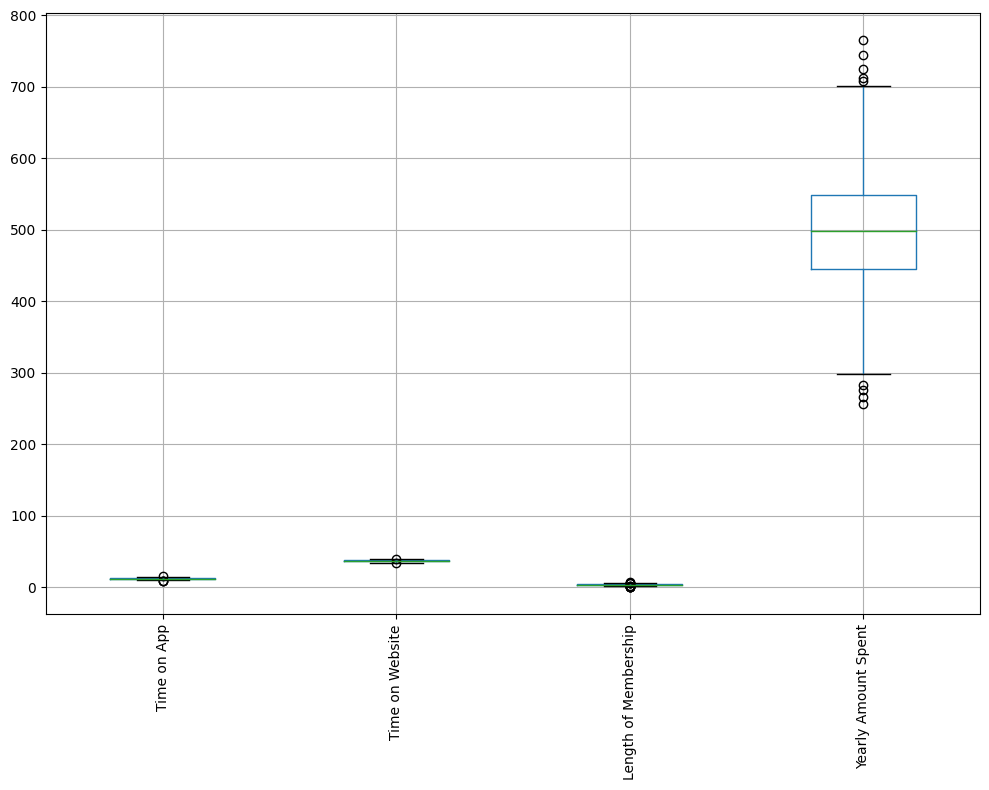

In [6]:
#Let's see what the whiskerbox looks like

df2.boxplot(figsize=(10,8))
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

#Given the outliers on the plot, these variables are normally distributed, shall we perhaps see this in a histogram

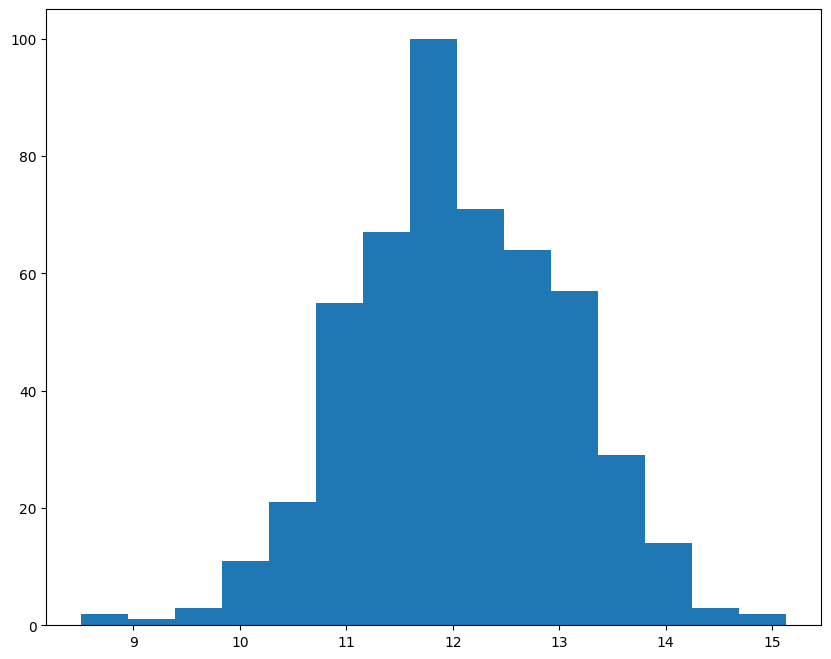

In [7]:
plt.figure(figsize=(10,8))
plt.hist(df2['Time on App'],bins=15)
plt.tight_layout
plt.show()

In [8]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [9]:
for p in [0.85,0.90,0.95]:
    m1,h1 = mean_confidence_interval(df2['Time on App'],p)
    m2,h2 = mean_confidence_interval(df2['Time on Website'],p)
    print(f'Conf={p:.2f} Time on App: {m1-h1:.2f}...{m1+h1:.2f}, Time on Website: {m2-h2:.2f}...{m2+h2:.2f} ')

Conf=0.85 Time on App: 11.99...12.12, Time on Website: 37.00...37.13 
Conf=0.90 Time on App: 11.98...12.13, Time on Website: 36.99...37.13 
Conf=0.95 Time on App: 11.97...12.14, Time on Website: 36.97...37.15 


In [10]:
#The above confidences for both Time on App and Time on Website seem withing range, however Time on Website proves to be higher than Time on App.